**Atualizando a biblioteca para plotagem de gráficos**


In [211]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Abrindo arquivos CSV e armazenando na memória**

Abrindo arquivos e armazenando em base_treino, base_teste e resultado_teste

In [213]:
base = pd.read_csv('/content/sample_data/heart-disease.csv', sep=',', encoding='latin-1')

In [214]:
novos_nomes_tabelas = {
    'ï»¿age' : 'Age',
    'sex' : 'Sex',
    'cp' : 'ChestPain',
    'trestbps' : 'RestingBloodPressure',
    'chol' : 'Cholesterol',
    'fbs' : 'FastingBloodSugar',
    'restecg' : 'RestingElectrocardiographic',
    'thalach' : 'MaximumHeartRateAchieved',
    'exang':'Exercise-Induced-Angina',
    'oldpeak' : 'ST-Depression',
    'slope' : 'InclinacaoSegmentoST',
    'ca' : 'MajorVessels',
    'thal' : 'Thalassemia',
    'target' : 'HasCardiacIllness'
}

base.rename(columns=novos_nomes_tabelas, inplace=True)

# **Pré-processamento da base**

Verificando quantos atributos são nulos

In [215]:
base.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestingBloodPressure,0
Cholesterol,0
FastingBloodSugar,0
RestingElectrocardiographic,0
MaximumHeartRateAchieved,0
Exercise-Induced-Angina,0
ST-Depression,0


**Verificando e tratando linhas duplicadas**

In [216]:
base.duplicated().sum()

1

In [217]:
base.drop_duplicates(inplace=True)

In [218]:
base.duplicated().sum()

0

In [219]:
base.duplicated().sum()

0

**Contando e visualizando a quantidade de opções que temos em cada atributo.**

Boxplot

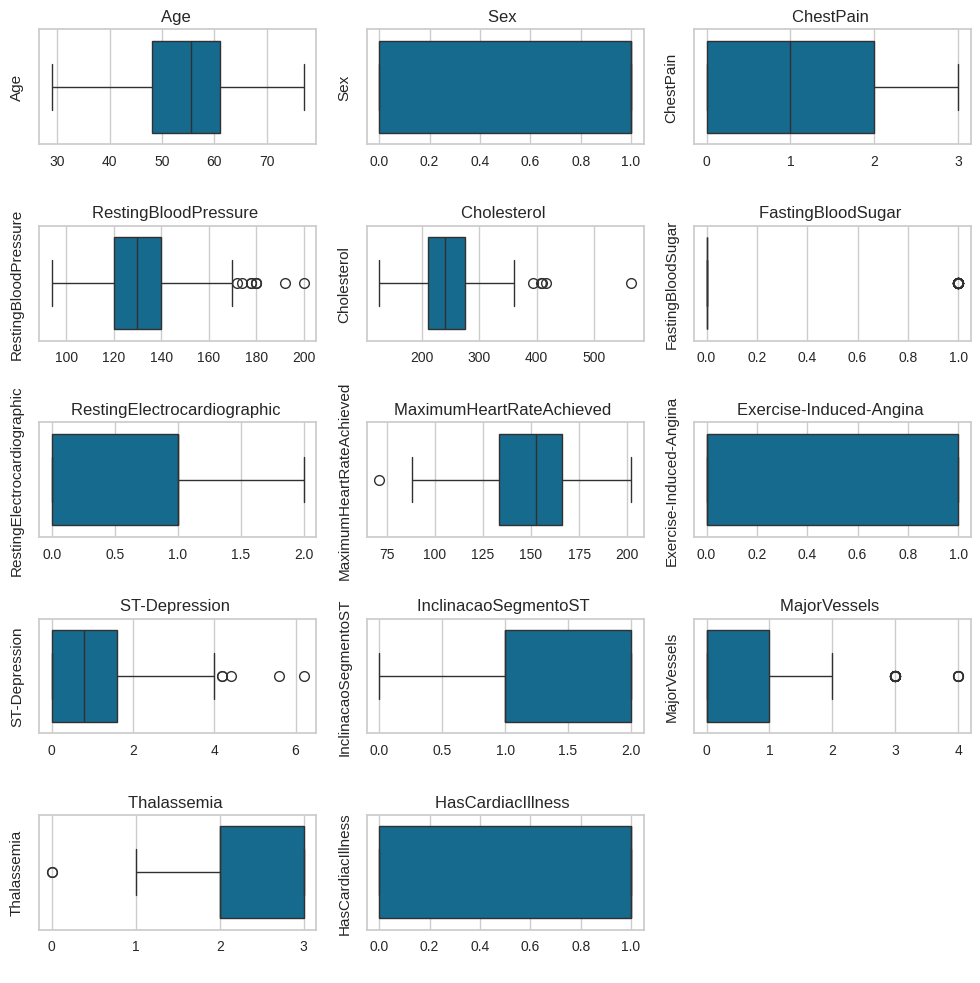

In [220]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(base.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=base, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

plt.show();

Distribuição para cada atributo

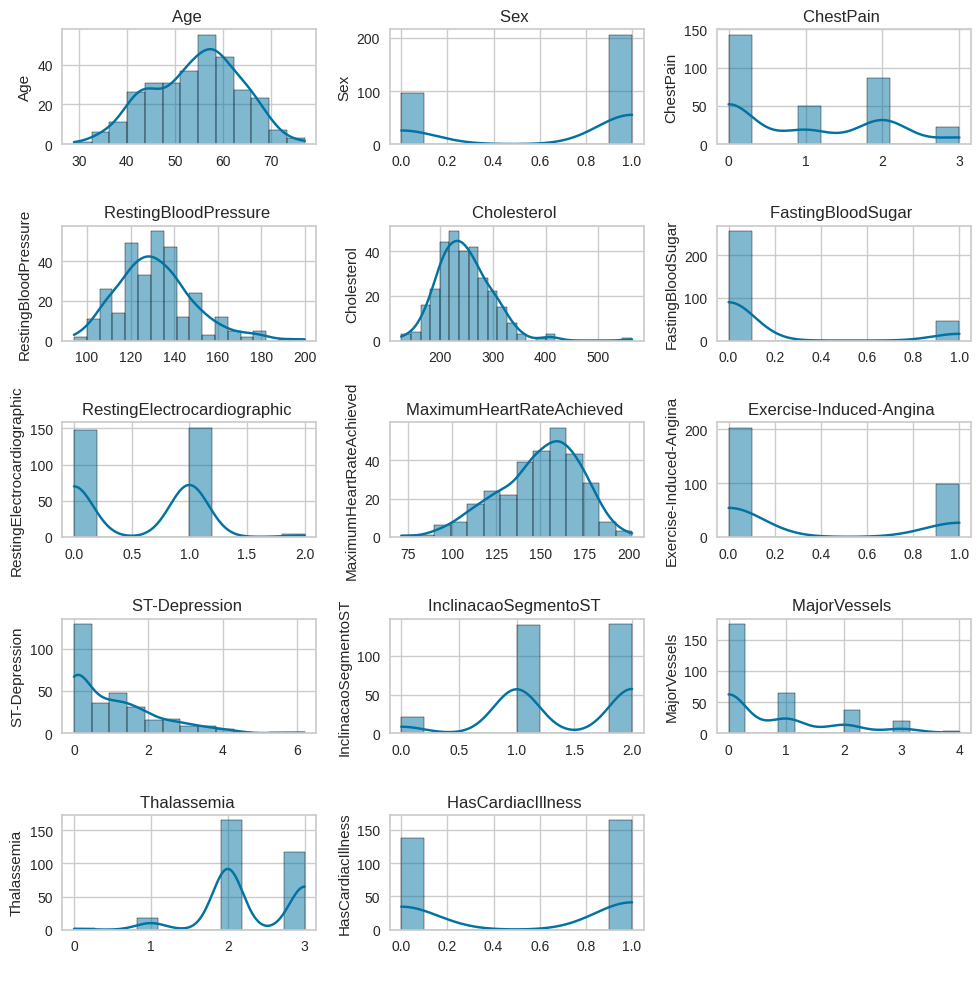

In [221]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(base.columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=base, x=feature, kde=True)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

plt.show();

Eliminando outliers

In [222]:
for column in base.columns:
  # Calcula a moda da coluna
  mode_value = base[column].mode()[0]

  # Define os limites superior e inferior para considerar outliers
  Q1 = base[column].quantile(0.25)
  Q3 = base[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Substitui os outliers pela moda
  base.loc[(base[column] < lower_bound) | (base[column] > upper_bound), column] = mode_value

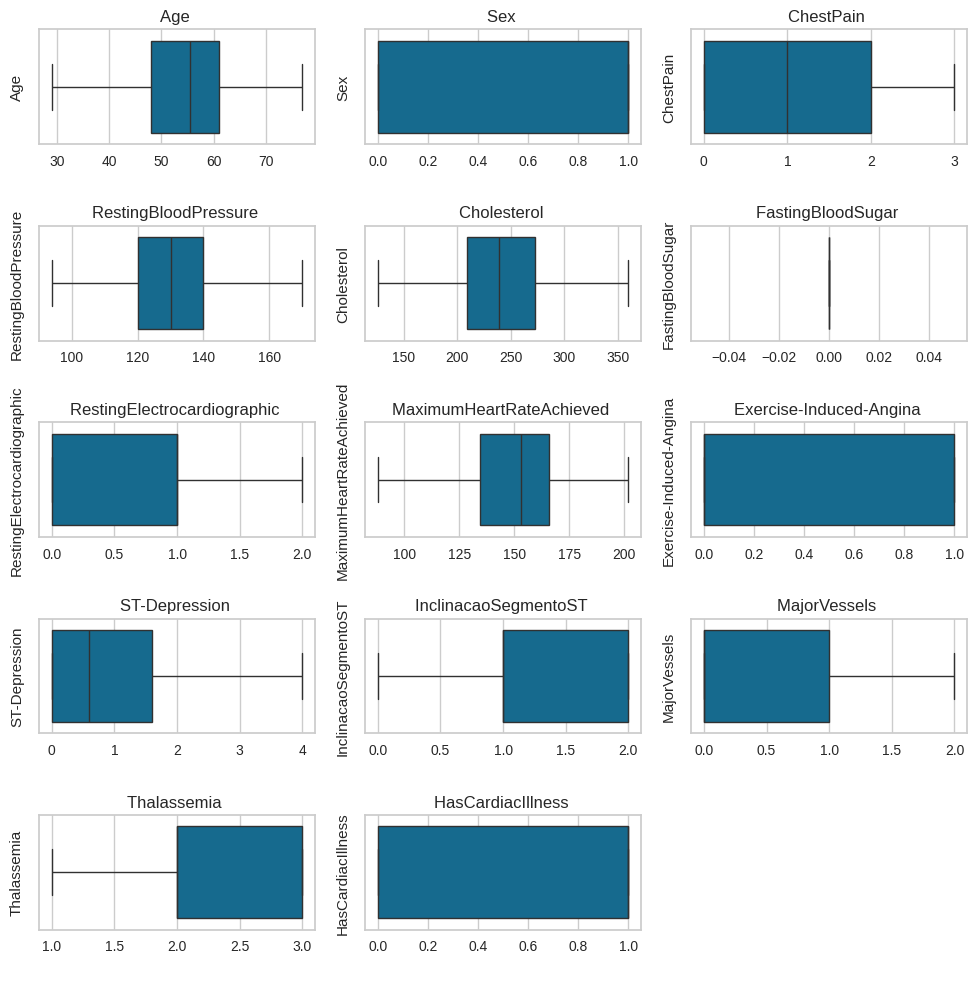

In [223]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(base.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=base, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

plt.show();

**Dividindo entre variável dependente e independente**

In [225]:
class_counts = base['HasCardiacIllness'].value_counts()
class_counts_df = class_counts.reset_index()
class_counts_df.columns = ['Class', 'Count']
print(class_counts_df)

   Class  Count
0      1    164
1      0    138


In [224]:
X_prev= base.drop(['HasCardiacIllness'], axis=1)
y_classe = base.HasCardiacIllness
print(X_prev.shape)
print(y_classe.shape)

(302, 13)
(302,)


**Separando amostragem**

In [19]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.2, random_state = 0)

In [20]:
X_treino.shape

(241, 13)

In [21]:
X_teste.shape

(61, 13)

**Aplicando Undersampling**

In [22]:
from imblearn.under_sampling import TomekLinks
balanceamento_under = TomekLinks(sampling_strategy='not minority')
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

**Quantas instâncias tinha em cada classe originalmente?**

In [23]:
np.unique(y_treino, return_counts=True)

(array([0, 1]), array([111, 130]))

**Quantas instâncias tem agora após o balanceamento?**

In [24]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([111, 110]))

**Aplicando Oversampling**

In [25]:
from imblearn.over_sampling import SMOTE
balanceamento_over = SMOTE(sampling_strategy='minority')
X_over, y_over = balanceamento_over.fit_resample(X_treino, y_treino)

In [26]:
X_over.shape, y_over.shape

((260, 13), (260,))

**Quantas instâncias tinha em cada classe originalmente?**

In [27]:
np.unique(y_treino, return_counts=True)

(array([0, 1]), array([111, 130]))

**Quantas instâncias tem agora após o balanceamento?**

In [28]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([130, 130]))

#**Treinamento a partir da base sem normalização por reescala**

## **Random Forest**

### **Treinamento com as classes desbalanceadas**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [29]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV

# parameters = {'n_estimators': [100, 200],
#               'criterion': ['gini', 'entropy'],
#               'max_features': ['sqrt', 'log2', None, 10, 15, 20, 25],
#               'random_state' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# randm_src = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions = parameters, cv = 5, n_iter = 28, n_jobs=-1)
# randm_src.fit(X_treino, y_treino)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [30]:
modelo = RandomForestClassifier(n_estimators=200, max_features='sqrt', criterion='gini', random_state = 7)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_estimators=200, random_state=7)

In [31]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
desbalanceada = accuracy_score(y_teste,previsoes)
desbalanceada

0.8852459016393442

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8852459016393442

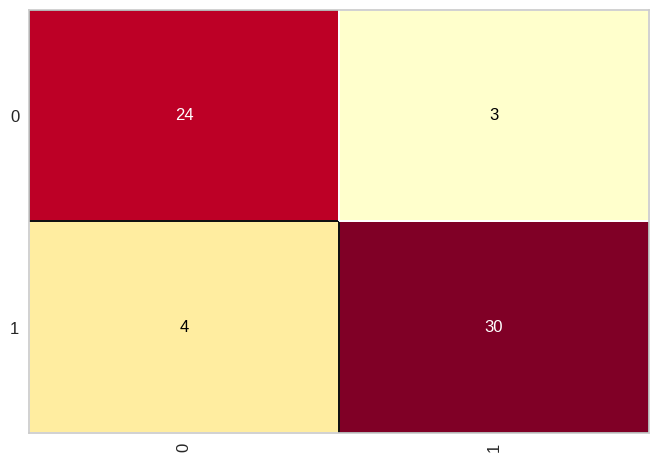

In [32]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [33]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### **Treinamendo com a base balanceada usando um método undersampling**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# parameters = {'n_estimators': [100, 200],
#               'criterion': ['gini', 'entropy'],
#               'max_features': ['sqrt', 'log2', None, 10, 15, 20, 25],
#               'random_state' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# randm_src = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions = parameters, cv = 5, n_iter = 28, n_jobs=-1)
# randm_src.fit(X_under, y_under)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_



# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [35]:
modelo2 = RandomForestClassifier(n_estimators=100, max_features='log2', criterion='gini', random_state = 5)
modelo2.fit(X_under, y_under)

RandomForestClassifier(max_features='log2', random_state=5)

In [36]:
previsoes = modelo2.predict(X_teste)
under_sampling = accuracy_score(y_teste,previsoes)
under_sampling

0.8524590163934426

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8524590163934426

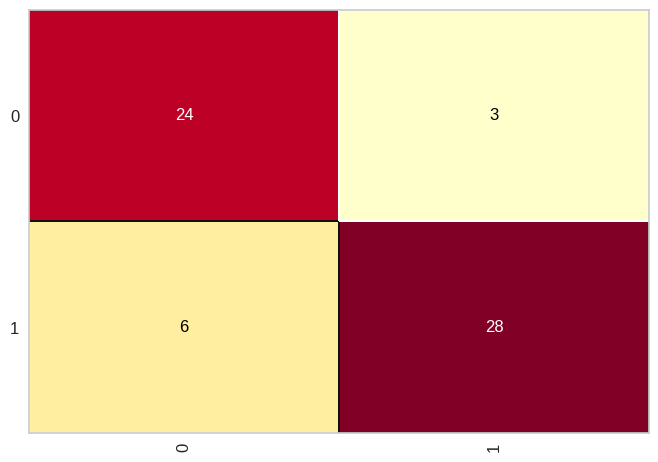

In [37]:
cm = ConfusionMatrix(modelo2)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [38]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



### **Treinamendo com a base balanceada usando um método oversampling**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [39]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV

# parameters = {'n_estimators': [100, 200],
#               'criterion': ['gini', 'entropy'],
#               'max_features': ['sqrt', 'log2', None, 10, 15, 20, 25],
#               'random_state' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# randm_src = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions = parameters, cv = 5, n_iter = 28, n_jobs=-1)
# randm_src.fit(X_over, y_over)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_




# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [40]:
modelo2 = RandomForestClassifier(n_estimators=200, max_features='sqrt', criterion='entropy', random_state = 15)
modelo2.fit(X_over, y_over)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=15)

In [41]:
previsoes = modelo2.predict(X_teste)
over_sampling = accuracy_score(y_teste,previsoes)
over_sampling

0.8852459016393442

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8852459016393442

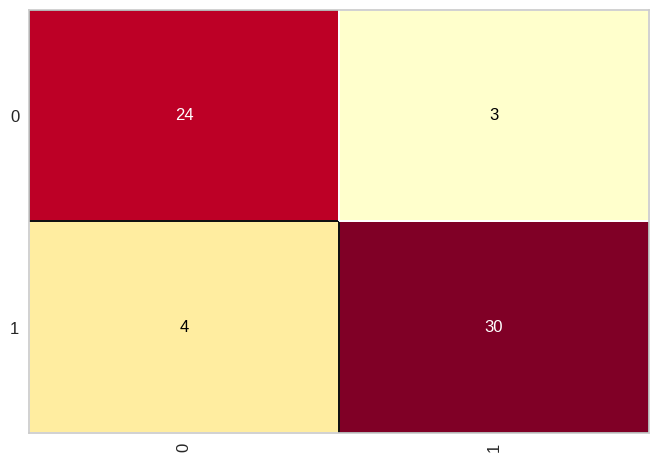

In [42]:
cm = ConfusionMatrix(modelo2)
cm.fit(X_over, y_over)
cm.score(X_teste, y_teste)

In [43]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### **Comparação de resultados**

In [44]:
# Criando um DataFrame com os resultados
resultados = pd.DataFrame({
    'Modelo' : ['RandomForestClassifier', 'RandomForestClassifier', 'RandomForestClassifier'],
    'Método': ['Over-sampling (base não normalizada)', 'Under-sampling (base não normalizada)', 'Desbalanceado (base não normalizada)'],
    'Acurácia': [over_sampling, under_sampling, desbalanceada]
})

# Ordenando o DataFrame pela acurácia em ordem decrescente
resultados_ordenados = resultados.sort_values('Acurácia', ascending=False)

resultados_finais = pd.DataFrame({
    'Método': [],
    'Acurácia': []
});
resultados_finais = pd.concat([resultados_finais, resultados_ordenados], ignore_index=True)

# Mostrando o DataFrame ordenado
print(resultados_ordenados)



                   Modelo                                 Método  Acurácia
0  RandomForestClassifier   Over-sampling (base não normalizada)  0.885246
2  RandomForestClassifier   Desbalanceado (base não normalizada)  0.885246
1  RandomForestClassifier  Under-sampling (base não normalizada)  0.852459


## **Naive Bayes**

### **Treinamento com as classes desbalanceadas**

In [45]:
from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import GridSearchCV


# parameters = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

# randm_src = GridSearchCV(estimator=GaussianNB(), param_grid = parameters, cv = 5, n_jobs=-1)
# randm_src.fit(X_treino, y_treino)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [46]:
modelo = GaussianNB(var_smoothing=1e-4)
modelo.fit(X_treino, y_treino)

GaussianNB(var_smoothing=0.0001)

In [47]:
previsoes = modelo.predict(X_teste)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
desbalanceada = accuracy_score(y_teste,previsoes)
desbalanceada

0.9180327868852459

In [49]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)


array([[23,  4],
       [ 1, 33]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.9180327868852459

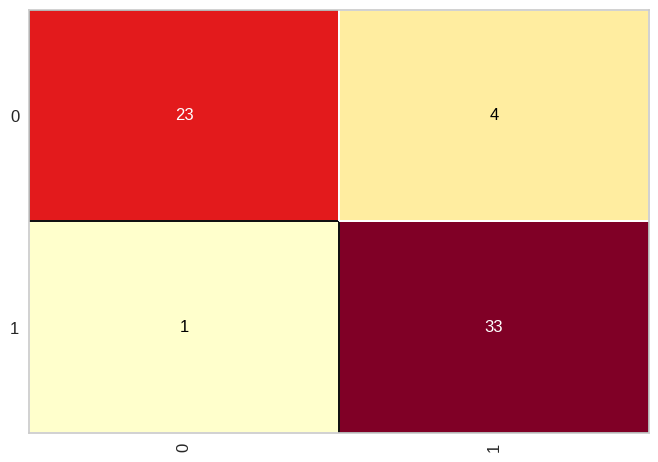

In [50]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [51]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.89      0.97      0.93        34

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



### **Treinamendo com a base balanceada usando um método undersampling**

In [52]:
# from sklearn.naive_bayes import GaussianNB

# parameters = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
#               }

# randm_src = GridSearchCV(estimator=GaussianNB(), param_grid = parameters, cv = 5, n_jobs=-1)
# randm_src.fit(X_under, y_under)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [53]:
modelo = GaussianNB(var_smoothing = 1e-5)
modelo.fit(X_under, y_under)

GaussianNB(var_smoothing=1e-05)

In [54]:
previsoes = modelo.predict(X_teste)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
under_sampling = accuracy_score(y_teste,previsoes)
under_sampling

0.8852459016393442

In [56]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[24,  3],
       [ 4, 30]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.8852459016393442

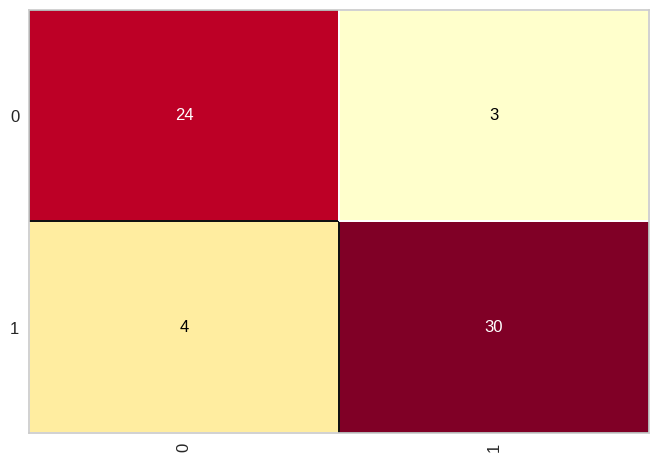

In [57]:
cm = ConfusionMatrix(modelo)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [58]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### **Treinamendo com a base balanceada usando um método oversampling**

In [59]:
# from sklearn.naive_bayes import GaussianNB

# parameters = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
#               }

# randm_src = GridSearchCV(estimator=GaussianNB(), param_grid = parameters, cv = 5, n_jobs=-1)
# randm_src.fit(X_over, y_over)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [60]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB(var_smoothing=1e-5)
modelo.fit(X_over, y_over)

GaussianNB(var_smoothing=1e-05)

In [61]:
previsoes = modelo.predict(X_teste)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
over_sampling = accuracy_score(y_teste,previsoes)
over_sampling

0.9180327868852459

In [63]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[24,  3],
       [ 2, 32]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.9180327868852459

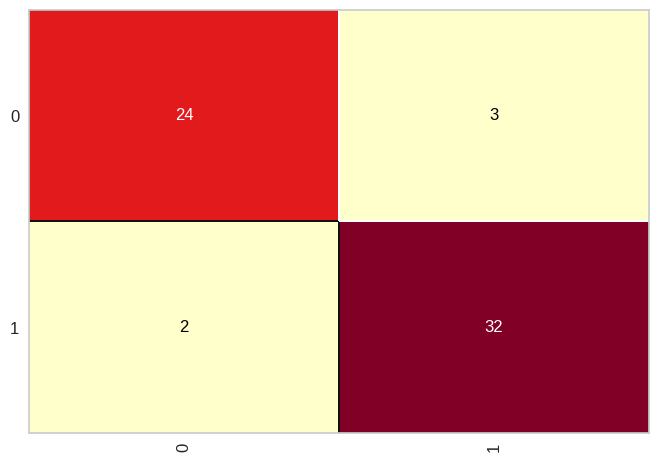

In [64]:
cm = ConfusionMatrix(modelo)
cm.fit(X_over, y_over)
cm.score(X_teste, y_teste)

In [65]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### **Comparação de resultados**

In [66]:
# Criando um DataFrame com os resultados
resultados = pd.DataFrame({
    'Modelo' : ['GaussianNB', 'GaussianNB', 'GaussianNB'],
    'Método': ['Over-sampling (base não normalizada)', 'Under-sampling (base não normalizada)', 'Desbalanceado (base não normalizada)'],
    'Acurácia': [over_sampling, under_sampling, desbalanceada]
})

# Ordenando o DataFrame pela acurácia em ordem decrescente
resultados_ordenados = resultados.sort_values('Acurácia', ascending=False)
resultados_finais = pd.concat([resultados_finais, resultados_ordenados], ignore_index=True)

# Mostrando o DataFrame ordenado
print(resultados_ordenados)


       Modelo                                 Método  Acurácia
0  GaussianNB   Over-sampling (base não normalizada)  0.918033
2  GaussianNB   Desbalanceado (base não normalizada)  0.918033
1  GaussianNB  Under-sampling (base não normalizada)  0.885246


## **Árvore de decisão**

### Treinamento com a base desbalanceada

In [67]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# parameters = {'criterion': ['gini', 'entropy'],
#               'max_depth': [2, 3, 4, 5, 6, None],
#               }

# grid_src = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = parameters, cv = 5, n_jobs=-1)
# grid_src.fit(X_treino, y_treino)

# best_score = grid_src.best_score_
# best_params = grid_src.best_params_

# print("\n Melhor resultado de todos os parametros buscados:\n", grid_src.best_score_)
# print("\n Parametros do melhor resultado:\n", grid_src.best_params_)

In [68]:
modelo = DecisionTreeClassifier(max_depth=3, criterion='gini')
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=3)

In [69]:
previsoes = modelo.predict(X_teste)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
desbalanceada = accuracy_score(y_teste,previsoes)
desbalanceada

0.8524590163934426

In [71]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[21,  6],
       [ 3, 31]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8524590163934426

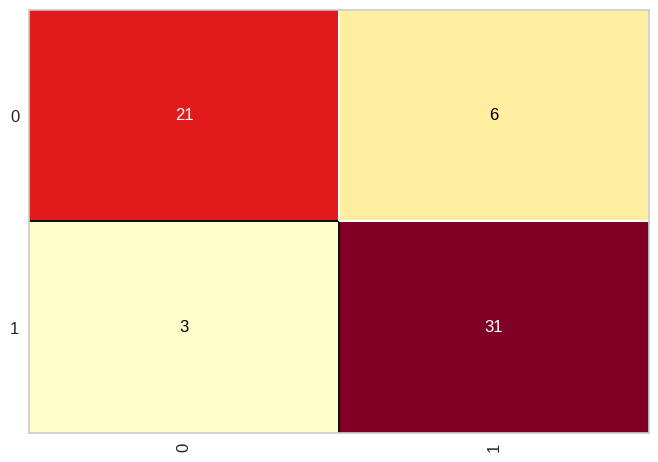

In [72]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [73]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



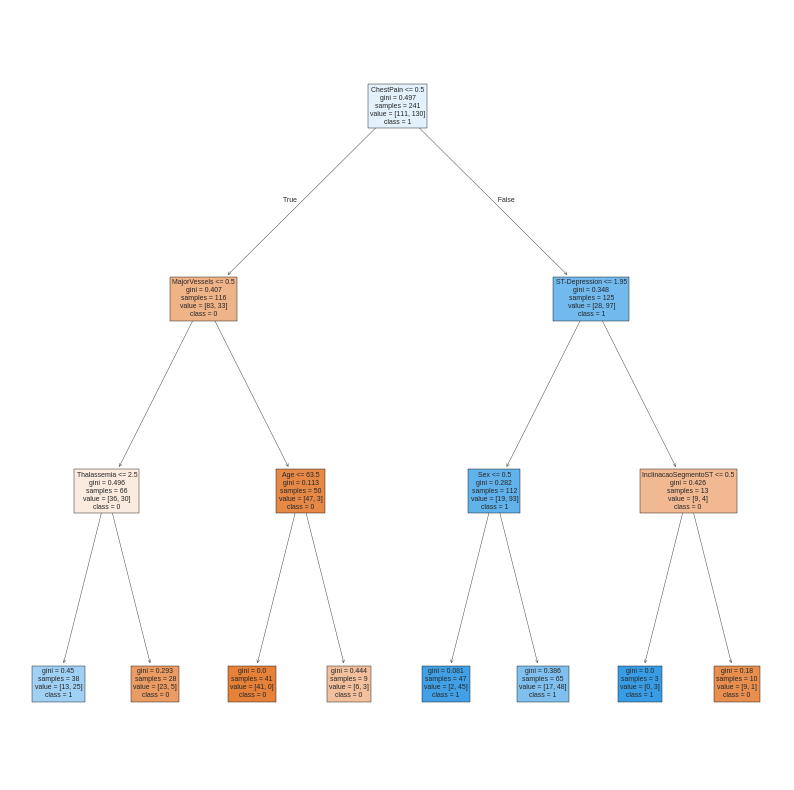

In [74]:
from sklearn import tree
cols_names = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
class_names = [str(c) for c in modelo.classes_]
tree.plot_tree(modelo, feature_names=cols_names, class_names = class_names, filled=True);

### Treinamendo com a base balanceada usando um método undersampling

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6, 7, 8],
              }

grid_src = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = parameters, cv = 60, n_jobs=-1)
grid_src.fit(X_under, y_under)

best_score = grid_src.best_score_
best_params = grid_src.best_params_

print("\n Melhor resultado de todos os parametros buscados:\n", grid_src.best_score_)
print("\n Parametros do melhor resultado:\n", grid_src.best_params_)


 Melhor resultado de todos os parametros buscados:
 0.773611111111111

 Parametros do melhor resultado:
 {'criterion': 'gini', 'max_depth': 8}


In [76]:
modelo = DecisionTreeClassifier(max_depth=4, criterion='gini')
modelo.fit(X_under, y_under)

DecisionTreeClassifier(max_depth=4)

In [77]:
previsoes = modelo.predict(X_teste)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
under_sampling = accuracy_score(y_teste,previsoes)
under_sampling

0.8688524590163934

In [79]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[24,  3],
       [ 5, 29]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8688524590163934

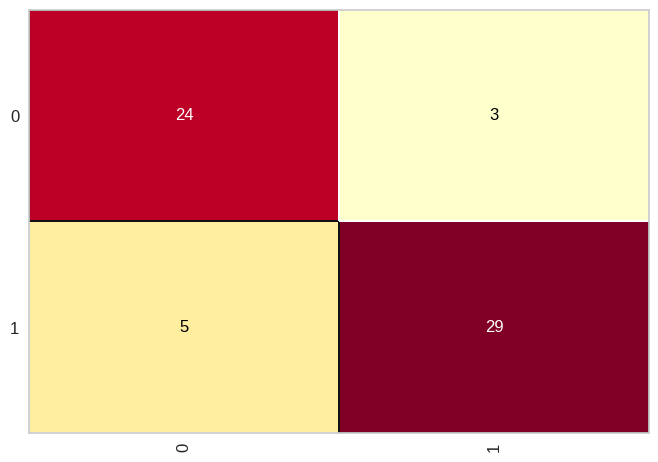

In [80]:
cm = ConfusionMatrix(modelo)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [81]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



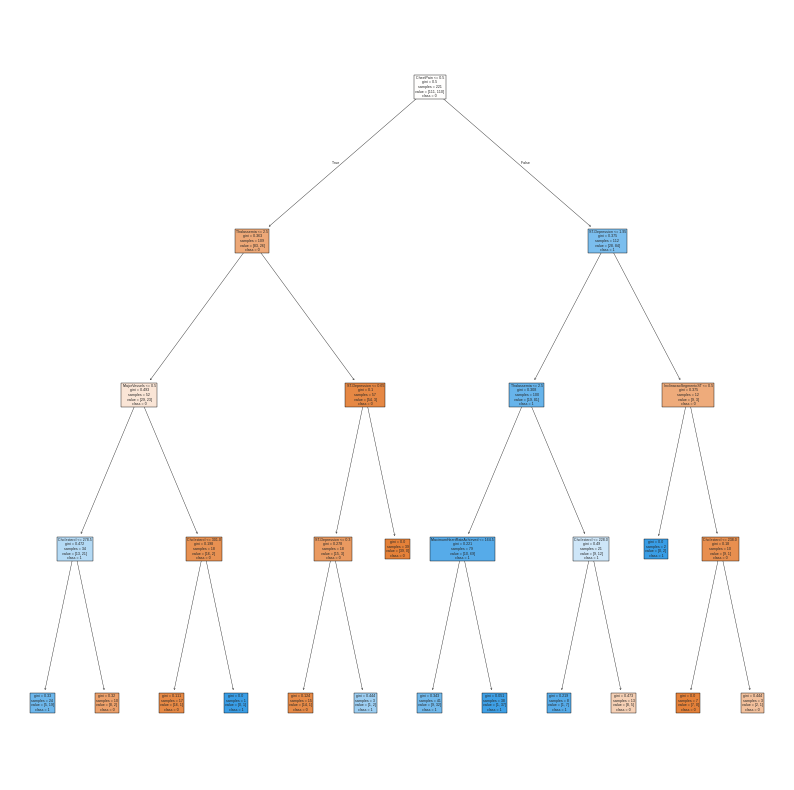

In [82]:
from sklearn import tree
cols_names = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
class_names = [str(c) for c in modelo.classes_]
tree.plot_tree(modelo, feature_names=cols_names, class_names = class_names, filled=True);

### Treinamendo com a base balanceada usando um método oversampling

In [83]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# parameters = {'criterion': ['gini', 'entropy'],
#               'max_depth': [2, 3, 4, 5, 6, 7, 8],
#               }

# grid_src = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = parameters, cv = 60, n_jobs=-1)
# grid_src.fit(X_over, y_over)

# best_score = grid_src.best_score_
# best_params = grid_src.best_params_

# print("\n Melhor resultado de todos os parametros buscados:\n", grid_src.best_score_)
# print("\n Parametros do melhor resultado:\n", grid_src.best_params_)

In [84]:
modelo = DecisionTreeClassifier(max_depth=3, criterion='gini')
modelo.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=3)

In [85]:
previsoes = modelo.predict(X_teste)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
over_sampling = accuracy_score(y_teste,previsoes)
over_sampling

0.8032786885245902

In [87]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[18,  9],
       [ 3, 31]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8032786885245902

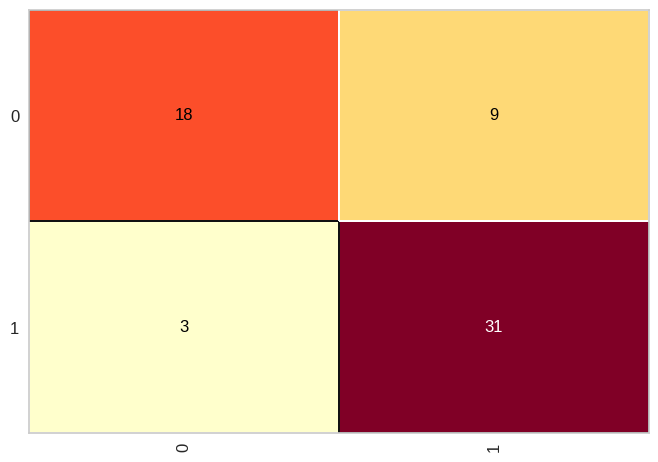

In [88]:
cm = ConfusionMatrix(modelo)
cm.fit(X_over, y_over)
cm.score(X_teste, y_teste)

In [89]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.78      0.91      0.84        34

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.79        61
weighted avg       0.81      0.80      0.80        61



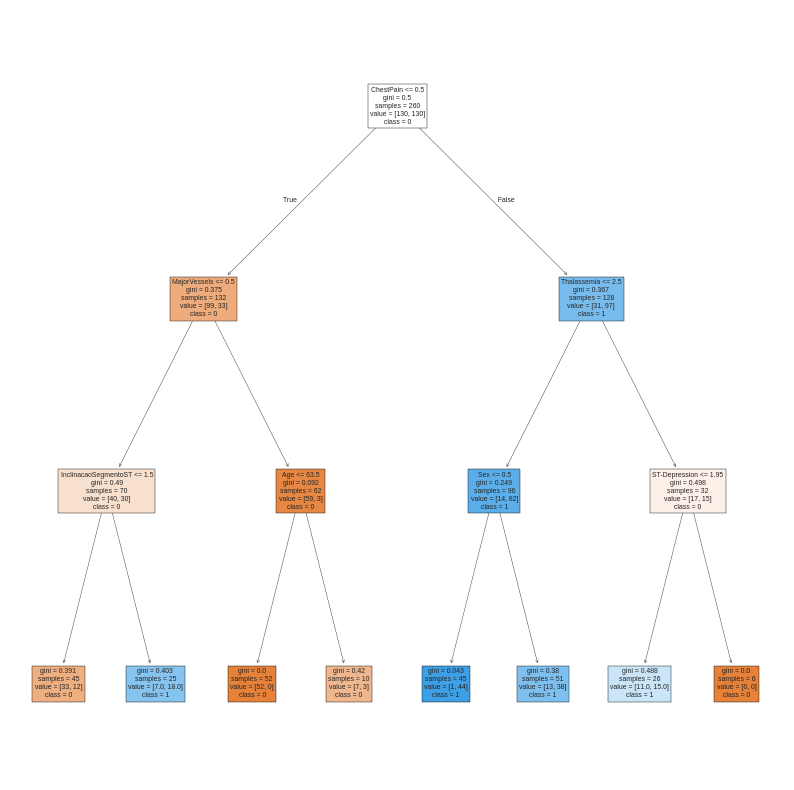

In [90]:
from sklearn import tree
cols_names = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
class_names = [str(c) for c in modelo.classes_]
tree.plot_tree(modelo, feature_names=cols_names, class_names = class_names, filled=True);

### **Comparação de resultados**

In [91]:
# Criando um DataFrame com os resultados
resultados = pd.DataFrame({
    'Modelo' : ['DecisionTreeClassifier', 'DecisionTreeClassifier', 'DecisionTreeClassifier'],
    'Método': ['Over-sampling (base não normalizada)', 'Under-sampling (base não normalizada)', 'Desbalanceado (base não normalizada)'],
    'Acurácia': [over_sampling, under_sampling, desbalanceada]
})

# Ordenando o DataFrame pela acurácia em ordem decrescente
resultados_ordenados = resultados.sort_values('Acurácia', ascending=False)
resultados_finais = pd.concat([resultados_finais, resultados_ordenados], ignore_index=True)

# Mostrando o DataFrame ordenado
print(resultados_ordenados)


                   Modelo                                 Método  Acurácia
1  DecisionTreeClassifier  Under-sampling (base não normalizada)  0.868852
2  DecisionTreeClassifier   Desbalanceado (base não normalizada)  0.852459
0  DecisionTreeClassifier   Over-sampling (base não normalizada)  0.803279


## **KNeighborsClassifier**

### **Treinamento com as classes desbalanceadas**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [92]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
#               'weights': ['uniform', 'distance'],
#               'p': [1, 2, 3, 4],
#               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

# randm_src = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = parameters, cv = 5, n_jobs=-1)
# randm_src.fit(X_treino, y_treino)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [93]:
modelo = KNeighborsClassifier(algorithm='auto', weights='uniform', p=11, n_neighbors=11)
modelo.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=11, p=11)

In [94]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
desbalanceada = accuracy_score(y_teste,previsoes)
desbalanceada

0.7377049180327869

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7377049180327869

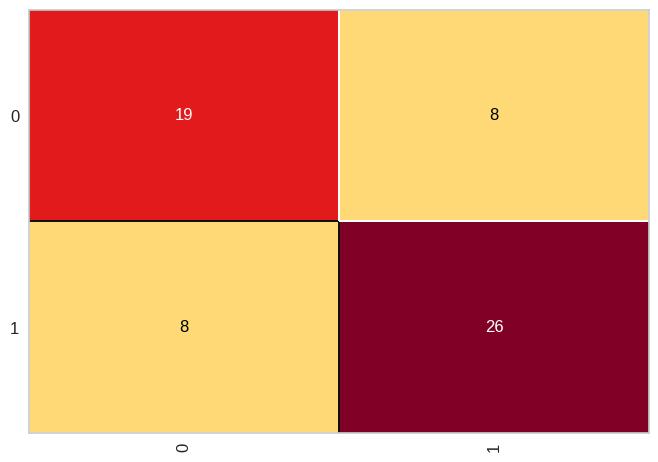

In [95]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [96]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        27
           1       0.76      0.76      0.76        34

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



### **Treinamendo com a base balanceada usando um método undersampling**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [97]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
#               'weights': ['uniform', 'distance'],
#               'p': [1, 2, 3, 4]}

# randm_src = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = parameters, cv = 5, n_jobs=-1)
# randm_src.fit(X_under, y_under)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [98]:
modelo = KNeighborsClassifier(weights='distance', p=1, n_neighbors=9)
modelo.fit(X_under, y_under)

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

In [99]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
under_sampling = accuracy_score(y_teste,previsoes)
under_sampling

0.7213114754098361

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7213114754098361

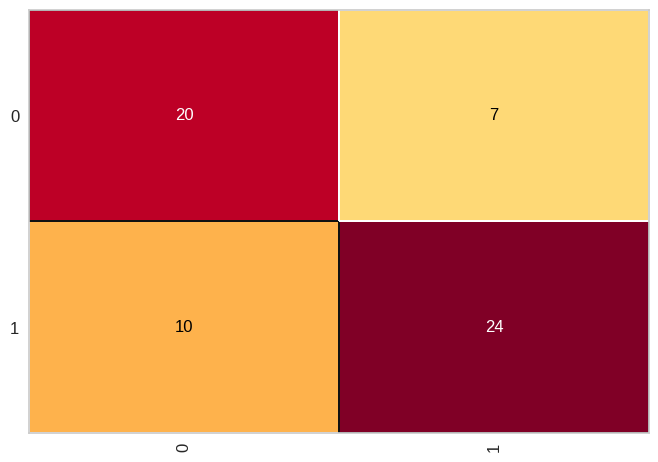

In [100]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [101]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        27
           1       0.77      0.71      0.74        34

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



### **Treinamendo com a base balanceada usando um método oversampling**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [102]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
#               'weights': ['uniform', 'distance'],
#               'p': [1, 2, 3, 4]}

# randm_src = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = parameters, cv = 5, n_jobs=-1)
# randm_src.fit(X_over, y_over)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [103]:
modelo = KNeighborsClassifier(weights='distance', p=1, n_neighbors=17)
modelo.fit(X_over, y_over)

KNeighborsClassifier(n_neighbors=17, p=1, weights='distance')

In [104]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
over_sampling = accuracy_score(y_teste,previsoes)
over_sampling

0.7377049180327869

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7377049180327869

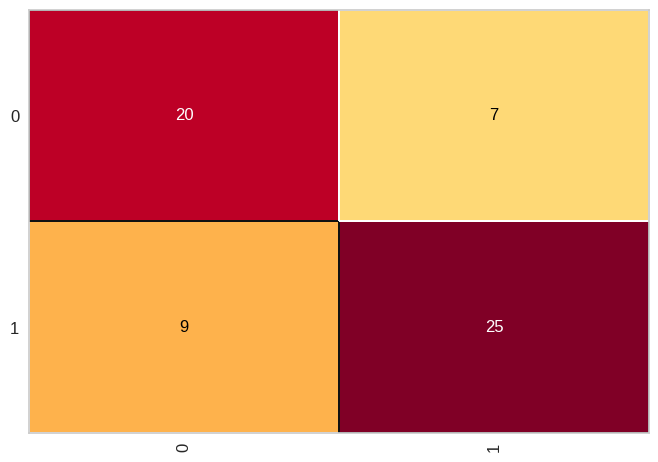

In [105]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_over, y_over)
cm.score(X_teste, y_teste)

In [106]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71        27
           1       0.78      0.74      0.76        34

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



### **Comparação de resultados**

In [107]:
# Criando um DataFrame com os resultados
resultados = pd.DataFrame({
    'Modelo' : ['KNeighborsClassifier', 'KNeighborsClassifier', 'KNeighborsClassifier'],
    'Método': ['Over-sampling (base não normalizada)', 'Under-sampling (base não normalizada)', 'Desbalanceado (base não normalizada)'],
    'Acurácia': [over_sampling, under_sampling, desbalanceada]
})

# Ordenando o DataFrame pela acurácia em ordem decrescente
resultados_ordenados = resultados.sort_values('Acurácia', ascending=False)
resultados_finais = pd.concat([resultados_finais, resultados_ordenados], ignore_index=True)

# Mostrando o DataFrame ordenado
print(resultados_ordenados)


                 Modelo                                 Método  Acurácia
0  KNeighborsClassifier   Over-sampling (base não normalizada)  0.737705
2  KNeighborsClassifier   Desbalanceado (base não normalizada)  0.737705
1  KNeighborsClassifier  Under-sampling (base não normalizada)  0.721311


# **Treinamento a partir da base normalizada por reescala**

Os códigos anteriores foram aplicados sem normalização. Caso a base seja normalizada, é observado uma queda no desempenho dos modelos RandomForest e Naive Bayes. Contudo, o desempenho da árvore de decisão aumentou.

##Pré processamento

Normalizando colunas com intervalos grandes

In [108]:
from sklearn.preprocessing import MinMaxScaler

# Cria um objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleciona as colunas que você deseja normalizar
colunas_para_normalizar = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaximumHeartRateAchieved']

# Aplica a normalização às colunas selecionadas
base[colunas_para_normalizar] = scaler.fit_transform(base[colunas_para_normalizar])

# Exibe a base de dados com as colunas normalizadas
base.head()


,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingElectrocardiographic,MaximumHeartRateAchieved,Exercise-Induced-Angina,ST-Depression,InclinacaoSegmentoST,MajorVessels,Thalassemia,HasCardiacIllness
0,0.708333,1,3,0.671053,0.457265,0,0,0.543860,0,2.3,0,0,1,1
1,0.166667,1,2,0.473684,0.529915,0,1,0.868421,0,3.5,0,0,2,1
2,0.250000,0,1,0.473684,0.333333,0,0,0.736842,0,1.4,2,0,2,1
3,0.562500,1,1,0.342105,0.470085,0,1,0.789474,0,0.8,2,0,2,1
4,0.583333,0,0,0.342105,0.974359,0,1,0.657895,1,0.6,2,0,2,1


**Dividindo entre variável dependente e independente**

In [109]:
X_prev= base.drop(['HasCardiacIllness'], axis=1)
y_classe = base.HasCardiacIllness
print(X_prev.shape)
print(y_classe.shape)

(302, 13)
(302,)


**Separando amostragem**

In [110]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.2, random_state = 0)

**Separando amostragem**

In [111]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.2, random_state = 0)

**Aplicando Undersampling**

In [112]:
from imblearn.under_sampling import TomekLinks
balanceamento_under = TomekLinks(sampling_strategy='not minority')
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

**Quantas instâncias tinha em cada classe originalmente?**

In [113]:
np.unique(y_treino, return_counts=True)

(array([0, 1]), array([111, 130]))

**Quantas instâncias tem agora após o balanceamento?**

In [114]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([111, 114]))

**Aplicando Oversampling**

In [115]:
from imblearn.over_sampling import SMOTE
balanceamento_over = SMOTE(sampling_strategy='minority')
X_over, y_over = balanceamento_over.fit_resample(X_treino, y_treino)

In [116]:
X_over.shape, y_over.shape

((260, 13), (260,))

**Quantas instâncias tinha em cada classe originalmente?**

In [117]:
np.unique(y_treino, return_counts=True)

(array([0, 1]), array([111, 130]))

**Quantas instâncias tem agora após o balanceamento?**

In [118]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([130, 130]))

## **Random Forest**

### **Treinamento com as classes desbalanceadas**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [119]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV

# parameters = {'n_estimators': [100, 200],
#               'criterion': ['gini', 'entropy'],
#               'max_features': ['sqrt', 'log2', None, 10, 15, 20, 25],
#               'random_state' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# randm_src = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions = parameters, cv = 5, n_iter = 28, n_jobs=-1)
# randm_src.fit(X_treino, y_treino)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [120]:
modelo = RandomForestClassifier(n_estimators=200, max_features='sqrt', criterion='gini', random_state = 6)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_estimators=200, random_state=6)

In [121]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
desbalanceada = accuracy_score(y_teste,previsoes)
desbalanceada

0.8852459016393442

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8852459016393442

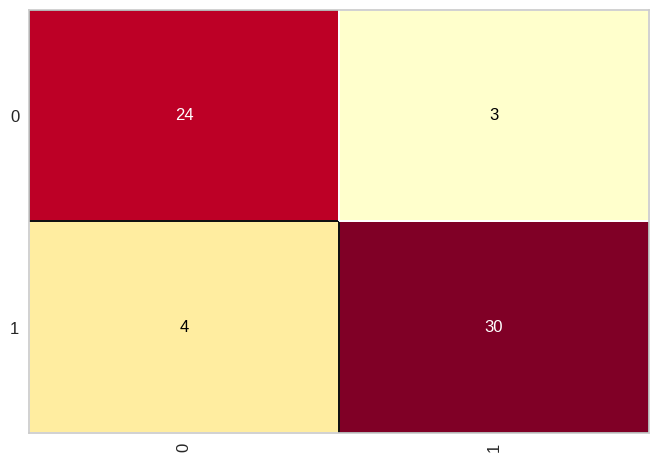

In [122]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [123]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### **Treinamendo com a base balanceada usando um método undersampling**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [124]:
from sklearn.model_selection import RandomizedSearchCV

# parameters = {'n_estimators': [100, 200],
#               'criterion': ['gini', 'entropy'],
#               'max_features': ['sqrt', 'log2', None, 10, 15, 20, 25],
#               'random_state' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# randm_src = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions = parameters, cv = 5, n_iter = 28, n_jobs=-1)
# randm_src.fit(X_under, y_under)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_



# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [125]:
modelo2 = RandomForestClassifier(n_estimators=100, max_features=15, criterion='gini', random_state = 13)
modelo2.fit(X_under, y_under)

RandomForestClassifier(max_features=15, random_state=13)

In [126]:
previsoes = modelo2.predict(X_teste)
under_sampling = accuracy_score(y_teste,previsoes)
under_sampling

0.8852459016393442

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8852459016393442

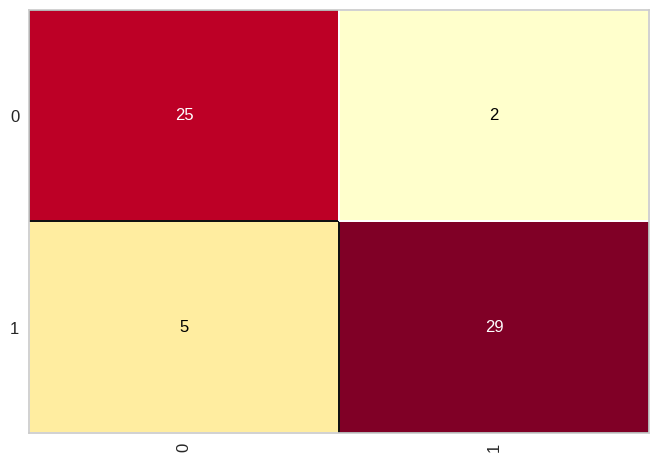

In [127]:
cm = ConfusionMatrix(modelo2)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [128]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.94      0.85      0.89        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### **Treinamendo com a base balanceada usando um método oversampling**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [129]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV

# parameters = {'n_estimators': [100, 200],
#               'criterion': ['gini', 'entropy'],
#               'max_features': ['sqrt', 'log2', None, 10, 15, 20, 25],
#               'random_state' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# randm_src = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions = parameters, cv = 5, n_iter = 28, n_jobs=-1)
# randm_src.fit(X_over, y_over)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_




# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [130]:
modelo2 = RandomForestClassifier(n_estimators=100, max_features='sqrt', criterion='gini', random_state = 12)
modelo2.fit(X_over, y_over)

RandomForestClassifier(random_state=12)

In [131]:
previsoes = modelo2.predict(X_teste)
over_sampling = accuracy_score(y_teste,previsoes)
over_sampling

0.8852459016393442

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8852459016393442

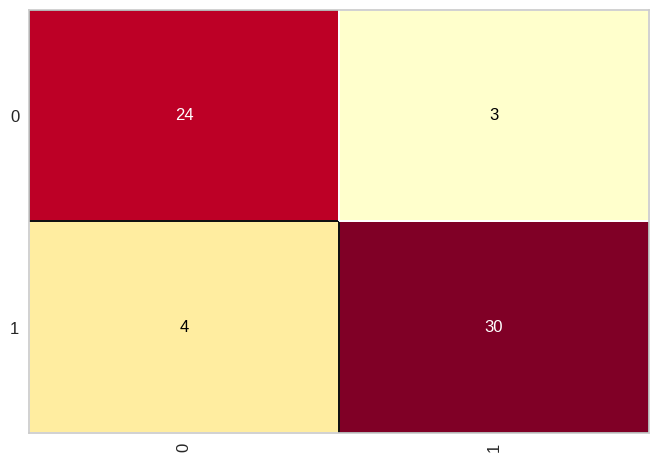

In [132]:
cm = ConfusionMatrix(modelo2)
cm.fit(X_over, y_over)
cm.score(X_teste, y_teste)

In [133]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### **Comparação de resultados**

In [134]:
# Criando um DataFrame com os resultados
resultados = pd.DataFrame({
    'Modelo' : ['RandomForestClassifier', 'RandomForestClassifier', 'RandomForestClassifier'],
    'Método': ['Over-sampling (normalizada)', 'Under-sampling (normalizada)', 'Desbalanceado (normalizada)'],
    'Acurácia': [over_sampling, under_sampling, desbalanceada]
})

# Ordenando o DataFrame pela acurácia em ordem decrescente
resultados_ordenados = resultados.sort_values('Acurácia', ascending=False)
resultados_finais = pd.concat([resultados_finais, resultados_ordenados], ignore_index=True)

# Mostrando o DataFrame ordenado
print(resultados_ordenados)


                   Modelo                        Método  Acurácia
0  RandomForestClassifier   Over-sampling (normalizada)  0.885246
1  RandomForestClassifier  Under-sampling (normalizada)  0.885246
2  RandomForestClassifier   Desbalanceado (normalizada)  0.885246


## **Naive Bayes**

### **Treinamento com as classes desbalanceadas**

In [135]:
# from sklearn.naive_bayes import GaussianNB

# parameters = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
#               }

# randm_src = GridSearchCV(estimator=GaussianNB(), param_grid = parameters, cv = 5, n_jobs=-1)
# randm_src.fit(X_treino, y_treino)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [136]:
modelo = GaussianNB(var_smoothing = 1e-2)
modelo.fit(X_treino, y_treino)

GaussianNB(var_smoothing=0.01)

In [137]:
previsoes = modelo.predict(X_teste)

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
desbalanceada = accuracy_score(y_teste,previsoes)
desbalanceada

0.9016393442622951

In [139]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)


array([[23,  4],
       [ 2, 32]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.9016393442622951

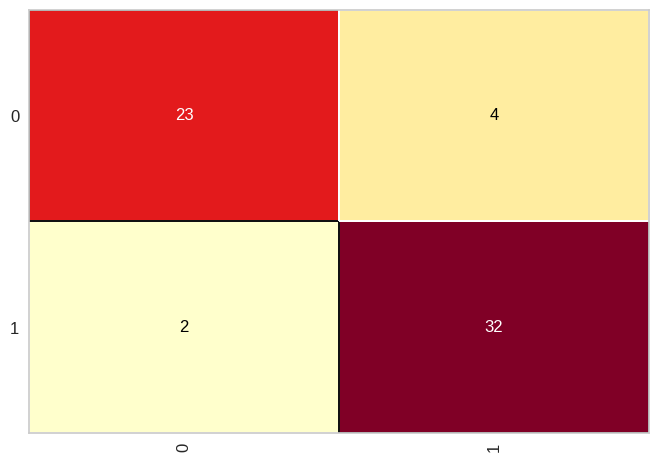

In [140]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [141]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### **Treinamendo com a base balanceada usando um método undersampling**

In [142]:
# from sklearn.naive_bayes import GaussianNB

# parameters = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
#               }

# randm_src = GridSearchCV(estimator=GaussianNB(), param_grid = parameters, cv = 5, n_jobs=-1)
# randm_src.fit(X_under, y_under)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [143]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB(var_smoothing=1e-1)
modelo.fit(X_under, y_under)

GaussianNB(var_smoothing=0.1)

In [144]:
previsoes = modelo.predict(X_teste)

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
under_sampling = accuracy_score(y_teste,previsoes)
under_sampling

0.9180327868852459

In [146]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[23,  4],
       [ 1, 33]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.9180327868852459

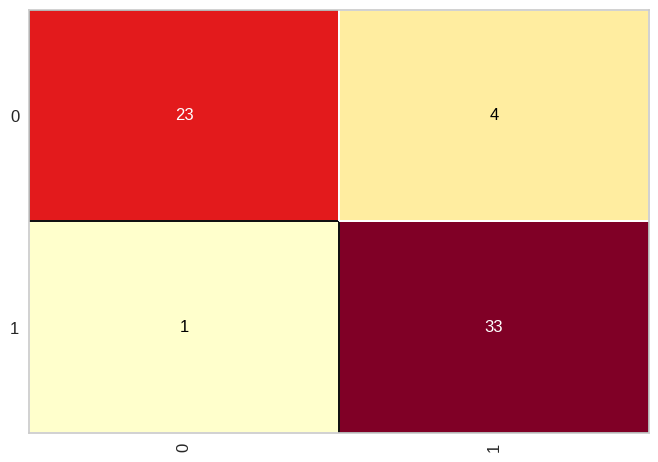

In [147]:
cm = ConfusionMatrix(modelo)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [148]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.89      0.97      0.93        34

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



### **Treinamendo com a base balanceada usando um método oversampling**

In [149]:
# from sklearn.naive_bayes import GaussianNB

# parameters = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
#               }

# randm_src = GridSearchCV(estimator=GaussianNB(), param_grid = parameters, cv = 5, n_jobs=-1)
# randm_src.fit(X_over, y_over)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [150]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB(var_smoothing=1e-2)
modelo.fit(X_over, y_over)

GaussianNB(var_smoothing=0.01)

In [151]:
previsoes = modelo.predict(X_teste)

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
over_sampling = accuracy_score(y_teste,previsoes)
over_sampling

0.9180327868852459

In [153]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[24,  3],
       [ 2, 32]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.9180327868852459

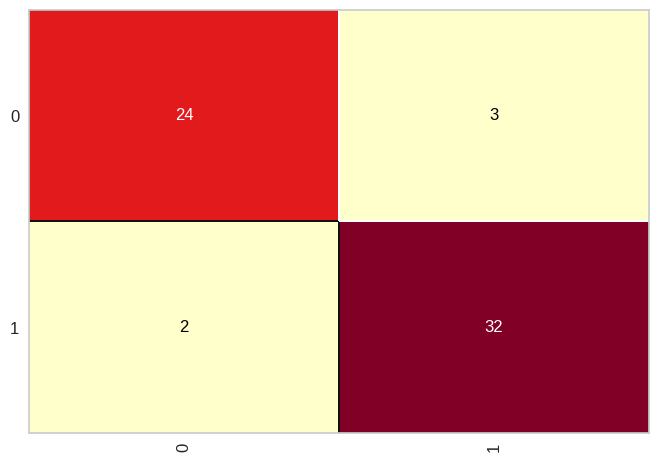

In [154]:
cm = ConfusionMatrix(modelo)
cm.fit(X_over, y_over)
cm.score(X_teste, y_teste)

In [155]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### **Comparação de resultados**

In [156]:
# Criando um DataFrame com os resultados
resultados = pd.DataFrame({
    'Modelo' : ['GaussianNB', 'GaussianNB', 'GaussianNB'],
    'Método': ['Over-sampling (normalizada)', 'Under-sampling (normalizada)', 'Desbalanceado (normalizada)'],
    'Acurácia': [over_sampling, under_sampling, desbalanceada]
})

# Ordenando o DataFrame pela acurácia em ordem decrescente
resultados_ordenados = resultados.sort_values('Acurácia', ascending=False)
resultados_finais = pd.concat([resultados_finais, resultados_ordenados], ignore_index=True)

# Mostrando o DataFrame ordenado
print(resultados_ordenados)


       Modelo                        Método  Acurácia
0  GaussianNB   Over-sampling (normalizada)  0.918033
1  GaussianNB  Under-sampling (normalizada)  0.918033
2  GaussianNB   Desbalanceado (normalizada)  0.901639


## **Árvore de decisão**

### Treinamento com a base desbalanceada

In [157]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# parameters = {'criterion': ['gini', 'entropy'],
#               'max_depth': [2, 3, 4, 5, 6, None],
#               }

# grid_src = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = parameters, cv = 5, n_jobs=-1)
# grid_src.fit(X_treino, y_treino)

# best_score = grid_src.best_score_
# best_params = grid_src.best_params_

# print("\n Melhor resultado de todos os parametros buscados:\n", grid_src.best_score_)
# print("\n Parametros do melhor resultado:\n", grid_src.best_params_)

In [158]:
modelo = DecisionTreeClassifier(max_depth=3, criterion='gini')
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=3)

In [159]:
previsoes = modelo.predict(X_teste)

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
desbalanceada = accuracy_score(y_teste,previsoes)
desbalanceada

0.8524590163934426

In [161]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[21,  6],
       [ 3, 31]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8524590163934426

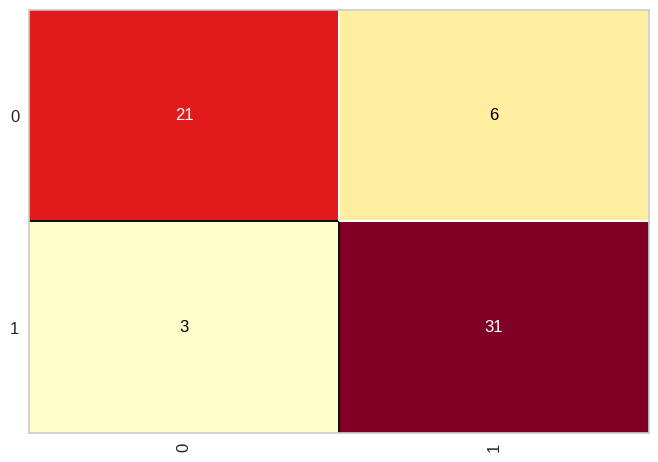

In [162]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [163]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



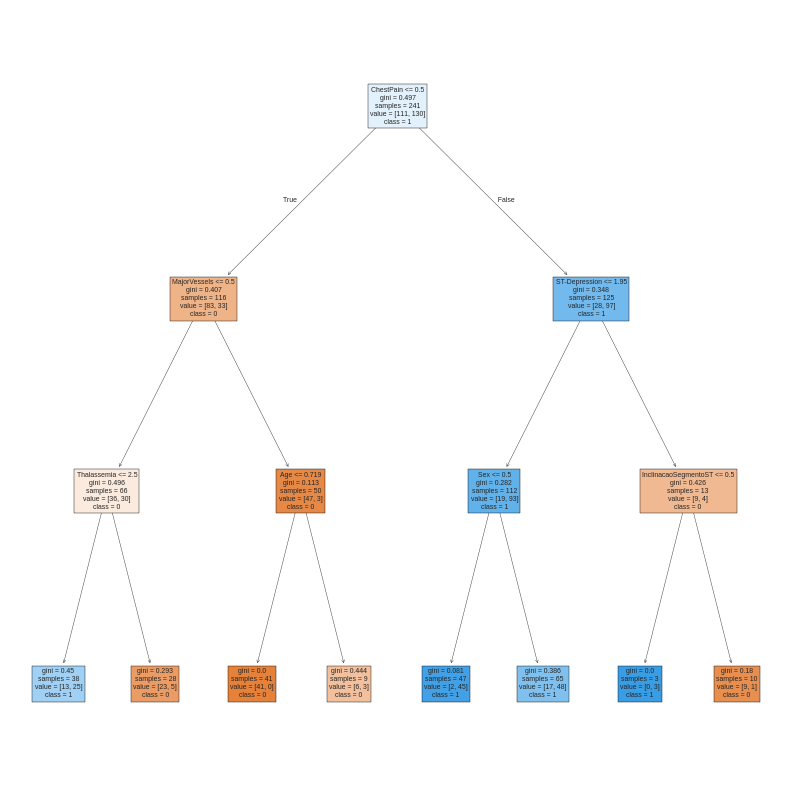

In [164]:
from sklearn import tree
cols_names = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
class_names = [str(c) for c in modelo.classes_]
tree.plot_tree(modelo, feature_names=cols_names, class_names = class_names, filled=True);

### Treinamendo com a base balanceada usando um método undersampling

In [165]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# parameters = {'criterion': ['gini', 'entropy'],
#               'max_depth': [2, 3, 4, 5, 6, None],
#               }

# grid_src = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = parameters, cv = 5, n_jobs=-1)
# grid_src.fit(X_under, y_under)

# best_score = grid_src.best_score_
# best_params = grid_src.best_params_

# print("\n Melhor resultado de todos os parametros buscados:\n", grid_src.best_score_)
# print("\n Parametros do melhor resultado:\n", grid_src.best_params_)

In [166]:
modelo = DecisionTreeClassifier(max_depth=3, criterion='entropy')
modelo.fit(X_under, y_under)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [167]:
previsoes = modelo.predict(X_teste)

In [168]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
under_sampling = accuracy_score(y_teste,previsoes)
under_sampling

0.8524590163934426

In [169]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[21,  6],
       [ 3, 31]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8524590163934426

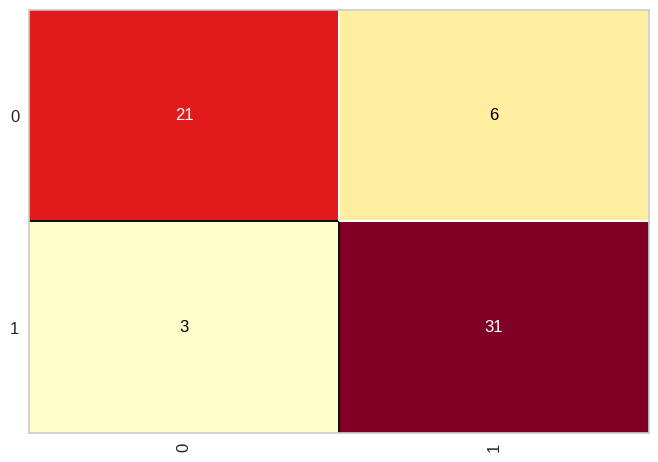

In [170]:
cm = ConfusionMatrix(modelo)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [171]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



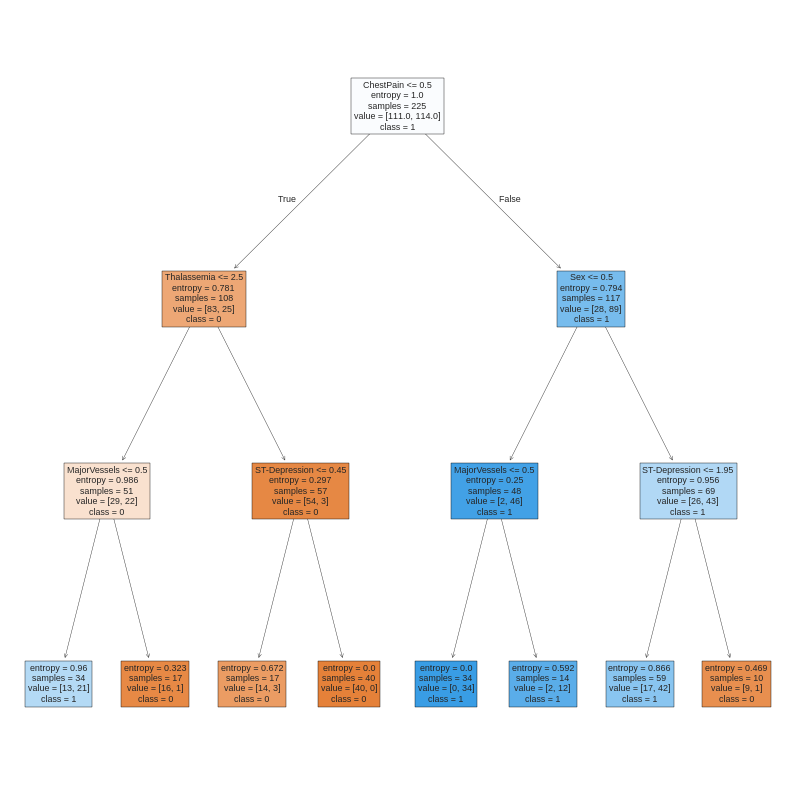

In [172]:
from sklearn import tree
cols_names = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
class_names = [str(c) for c in modelo.classes_]
tree.plot_tree(modelo, feature_names=cols_names, class_names = class_names, filled=True);

### Treinamendo com a base balanceada usando um método oversampling

In [173]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# parameters = {'criterion': ['gini', 'entropy'],
#               'max_depth': [2, 3, 4, 5, 6],
#               }

# grid_src = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = parameters, cv = 5, n_jobs=-1)
# grid_src.fit(X_over, y_over)

# best_score = grid_src.best_score_
# best_params = grid_src.best_params_

# print("\n Melhor resultado de todos os parametros buscados:\n", grid_src.best_score_)
# print("\n Parametros do melhor resultado:\n", grid_src.best_params_)

In [174]:
modelo = DecisionTreeClassifier(max_depth=3, criterion='gini')
modelo.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=3)

In [175]:
previsoes = modelo.predict(X_teste)

In [176]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
over_sampling = accuracy_score(y_teste,previsoes)
over_sampling

0.8032786885245902

In [177]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[18,  9],
       [ 3, 31]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8032786885245902

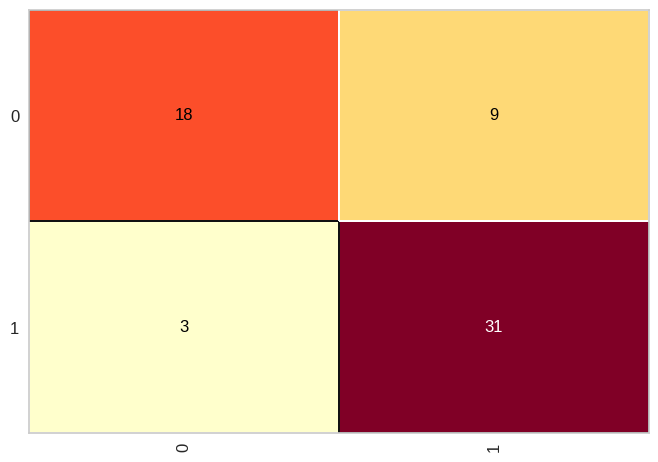

In [178]:
cm = ConfusionMatrix(modelo)
cm.fit(X_over, y_over)
cm.score(X_teste, y_teste)

In [179]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.78      0.91      0.84        34

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.79        61
weighted avg       0.81      0.80      0.80        61



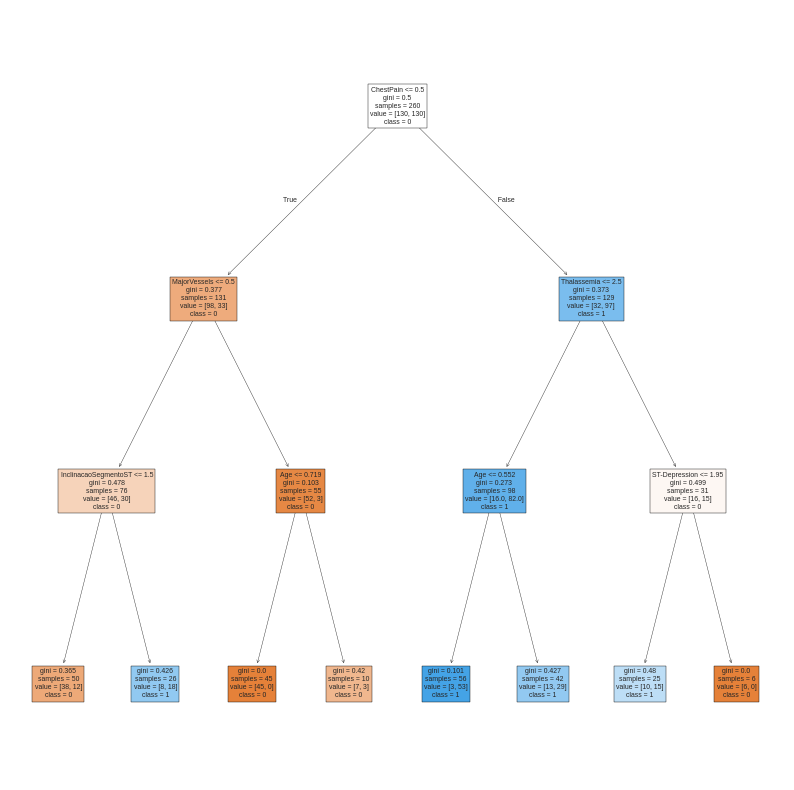

In [180]:
from sklearn import tree
cols_names = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
class_names = [str(c) for c in modelo.classes_]
tree.plot_tree(modelo, feature_names=cols_names, class_names = class_names, filled=True);

### **Comparação de resultados**

In [181]:
# Criando um DataFrame com os resultados
resultados = pd.DataFrame({
    'Modelo' : ['DecisionTreeClassifier', 'DecisionTreeClassifier', 'DecisionTreeClassifier'],
    'Método': ['Over-sampling (normalizada)', 'Under-sampling (normalizada)', 'Desbalanceado (normalizada)'],
    'Acurácia': [over_sampling, under_sampling, desbalanceada]
})

# Ordenando o DataFrame pela acurácia em ordem decrescente
resultados_ordenados = resultados.sort_values('Acurácia', ascending=False)
resultados_finais = pd.concat([resultados_finais, resultados_ordenados], ignore_index=True)

# Mostrando o DataFrame ordenado
print(resultados_ordenados)


                   Modelo                        Método  Acurácia
1  DecisionTreeClassifier  Under-sampling (normalizada)  0.852459
2  DecisionTreeClassifier   Desbalanceado (normalizada)  0.852459
0  DecisionTreeClassifier   Over-sampling (normalizada)  0.803279


## KNeighborsClassifier

### **Treinamento com as classes desbalanceadas**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [182]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV

# parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
#               'weights': ['uniform', 'distance'],
#               'p': [1, 2, 3] }

# randm_src = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions = parameters, cv = 5, n_iter = 60, n_jobs=-1)
# randm_src.fit(X_treino, y_treino)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [183]:
modelo = KNeighborsClassifier(weights='distance', p=1, n_neighbors=15)
modelo.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')

In [184]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
desbalanceada = accuracy_score(y_teste,previsoes)
desbalanceada

0.9180327868852459

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9180327868852459

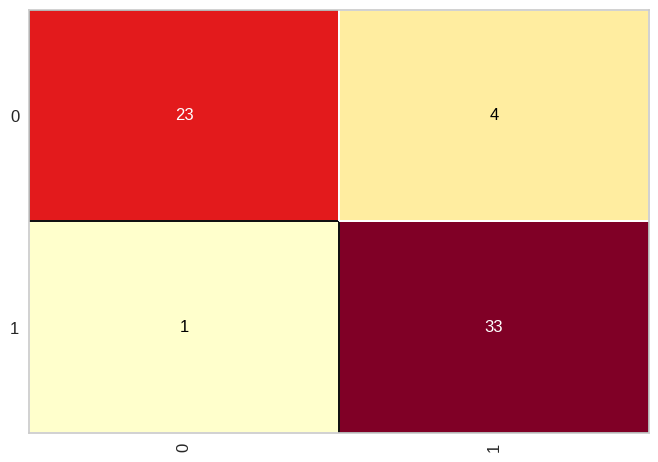

In [185]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [186]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.89      0.97      0.93        34

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



### **Treinamendo com a base balanceada usando um método undersampling**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [187]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV

# parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
#               'weights': ['uniform', 'distance'],
#               'p': [1, 2, 3] }

# randm_src = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions = parameters, cv = 10, n_iter = 60, n_jobs=-1)
# randm_src.fit(X_under, y_under)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [188]:
modelo = KNeighborsClassifier(weights='distance', p=1, n_neighbors=15)
modelo.fit(X_under, y_under)

KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')

In [189]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
under_sampling = accuracy_score(y_teste,previsoes)
under_sampling

0.8688524590163934

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8688524590163934

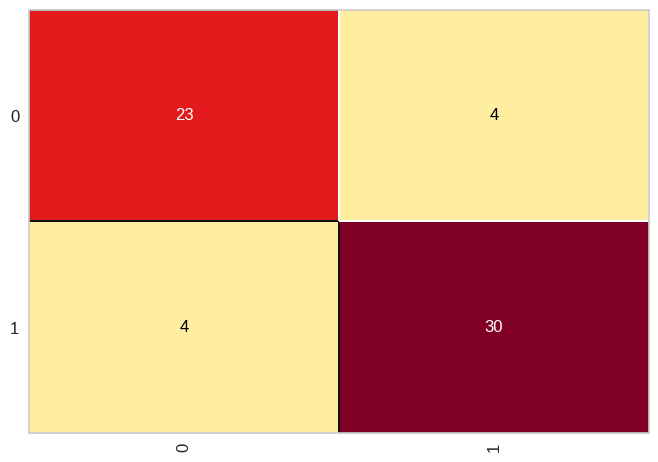

In [190]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [191]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### **Treinamendo com a base balanceada usando um método undersampling**

Escolhendo hiperparâmetros melhores com RandomizedSearchCV

In [192]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV

# parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
#               'weights': ['uniform', 'distance'],
#               'p': [1, 2, 3] }

# randm_src = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions = parameters, cv = 10, n_iter = 60, n_jobs=-1)
# randm_src.fit(X_over, y_over)

# best_score = randm_src.best_score_
# best_params = randm_src.best_params_


# print("\n Melhor resultado de todos os parametros buscados:\n",best_score)
# print("\n Parametros do melhor resultado:\n", best_params)

In [193]:
modelo = KNeighborsClassifier(weights='distance', p=1, n_neighbors=17)
modelo.fit(X_over, y_over)

KNeighborsClassifier(n_neighbors=17, p=1, weights='distance')

In [194]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
under_sampling = accuracy_score(y_teste,previsoes)
under_sampling

0.9016393442622951

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9016393442622951

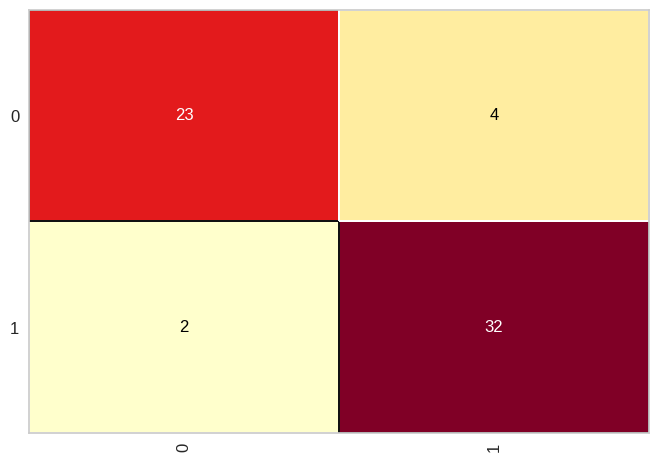

In [195]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_over, y_over)
cm.score(X_teste, y_teste)

In [196]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### **Comparação de resultados**

In [197]:
# Criando um DataFrame com os resultados
resultados = pd.DataFrame({
    'Modelo' : ['KNeighborsClassifier', 'KNeighborsClassifier', 'KNeighborsClassifier'],
    'Método': ['Over-sampling (normalizada)', 'Under-sampling (normalizada)', 'Desbalanceado (normalizada)'],
    'Acurácia': [over_sampling, under_sampling, desbalanceada]
})

# Ordenando o DataFrame pela acurácia em ordem decrescente
resultados_ordenados = resultados.sort_values('Acurácia', ascending=False)
resultados_finais = pd.concat([resultados_finais, resultados_ordenados], ignore_index=True)

# Mostrando o DataFrame ordenado
print(resultados_ordenados)


                 Modelo                        Método  Acurácia
2  KNeighborsClassifier   Desbalanceado (normalizada)  0.918033
1  KNeighborsClassifier  Under-sampling (normalizada)  0.901639
0  KNeighborsClassifier   Over-sampling (normalizada)  0.803279


# **Resultados Finais**

In [198]:
resultados_finais = resultados_finais.sort_values('Acurácia', ascending=False)
resultados_finais

,Método,Acurácia,Modelo
3,Over-sampling (base não normalizada),0.918033,GaussianNB
4,Desbalanceado (base não normalizada),0.918033,GaussianNB
21,Desbalanceado (normalizada),0.918033,KNeighborsClassifier
16,Under-sampling (normalizada),0.918033,GaussianNB
15,Over-sampling (normalizada),0.918033,GaussianNB
22,Under-sampling (normalizada),0.901639,KNeighborsClassifier
17,Desbalanceado (normalizada),0.901639,GaussianNB
0,Over-sampling (base não normalizada),0.885246,RandomForestClassifier
1,Desbalanceado (base não normalizada),0.885246,RandomForestClassifier
14,Desbalanceado (normalizada),0.885246,RandomForestClassifier


In [199]:
# prompt: Mostrar para cada modelo separadamente

# Resultados Random Forest
print("Resultados Random Forest:")
print(resultados_finais[resultados_finais['Modelo'] == 'RandomForestClassifier'])

# Resultados Naive Bayes
print("\nResultados Naive Bayes:")
print(resultados_finais[resultados_finais['Modelo'] == 'GaussianNB'])

# Resultados Árvore de Decisão
print("\nResultados Árvore de Decisão:")
print(resultados_finais[resultados_finais['Modelo'] == 'DecisionTreeClassifier'])

# Resultados KNeighborsClassifier
print("\nResultados KNeighborsClassifier:")
print(resultados_finais[resultados_finais['Modelo'] == 'KNeighborsClassifier'])


Resultados Random Forest:
                                   Método  Acurácia                  Modelo
0    Over-sampling (base não normalizada)  0.885246  RandomForestClassifier
1    Desbalanceado (base não normalizada)  0.885246  RandomForestClassifier
14            Desbalanceado (normalizada)  0.885246  RandomForestClassifier
13           Under-sampling (normalizada)  0.885246  RandomForestClassifier
12            Over-sampling (normalizada)  0.885246  RandomForestClassifier
2   Under-sampling (base não normalizada)  0.852459  RandomForestClassifier

Resultados Naive Bayes:
                                   Método  Acurácia      Modelo
3    Over-sampling (base não normalizada)  0.918033  GaussianNB
4    Desbalanceado (base não normalizada)  0.918033  GaussianNB
16           Under-sampling (normalizada)  0.918033  GaussianNB
15            Over-sampling (normalizada)  0.918033  GaussianNB
17            Desbalanceado (normalizada)  0.901639  GaussianNB
5   Under-sampling (base não norm

#Imagem que descreve os resultados finais:

In [200]:
# import matplotlib.pyplot as plt
# import seaborn as sns


# # Criar uma nova coluna 'Fase' para indicar antes ou depois da normalização
# resultados_finais['Fase'] = resultados_finais['Método'].apply(lambda x: 'Antes da Normalização' if '(base não normalizada)' in x else 'Após a Normalização')

# # Reordenar as linhas do DataFrame
# resultados_finais = resultados_finais.sort_values(['Fase', 'Método'], ascending=[True, True])

# plt.figure(figsize=(12, 9))

# # Gráfico de barras usando seaborn
# ax = sns.barplot(x='Método', y='Acurácia', data=resultados_finais, hue='Modelo', dodge=True)

# plt.title('Comparação de Acurácia dos Modelos')
# plt.xlabel('Método de Balanceamento')
# plt.ylabel('Acurácia')
# plt.xticks(rotation=45, ha='right')

# # Mover a legenda para baixo
# handles, labels = ax.get_legend_handles_labels()
# plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=len(labels))

# plt.tight_layout()
# plt.show()

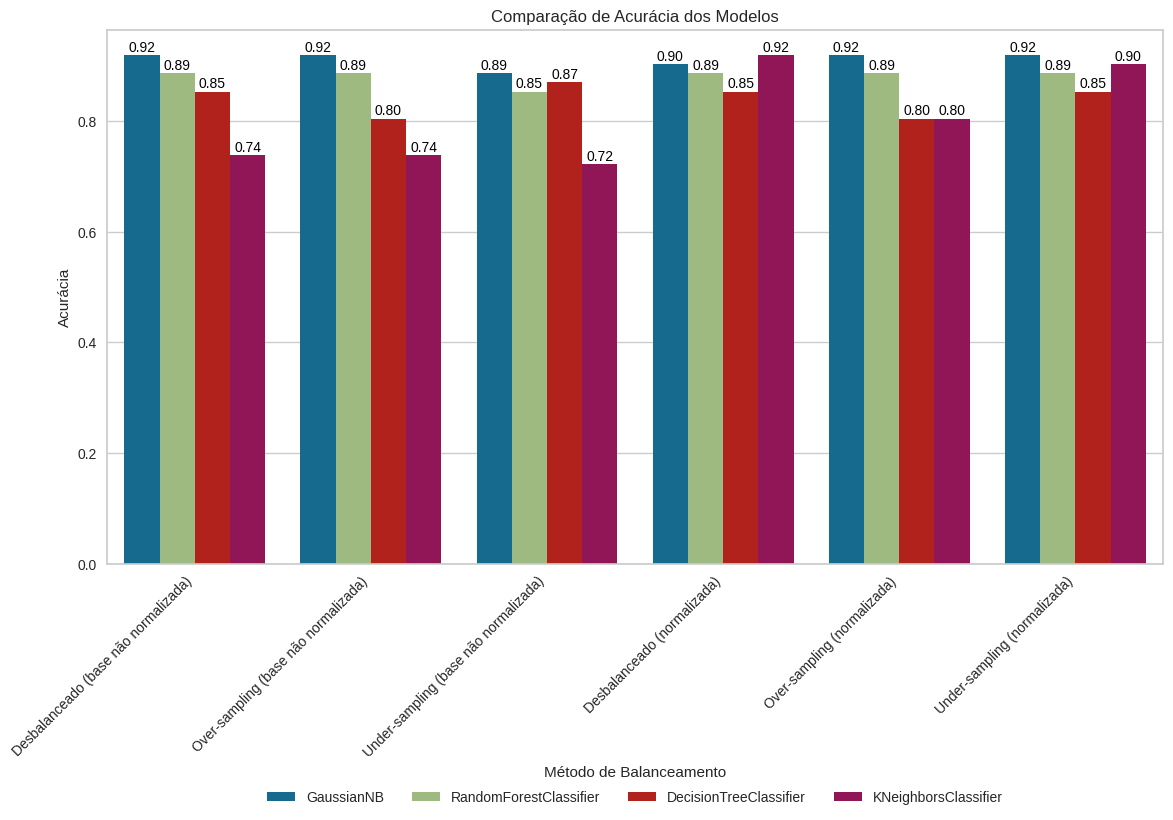

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma nova coluna 'Fase' para indicar antes ou depois da normalização
resultados_finais['Fase'] = resultados_finais['Método'].apply(lambda x: 'Antes da Normalização' if '(base não normalizada)' in x else 'Após a Normalização')

# Reordenar as linhas do DataFrame
resultados_finais = resultados_finais.sort_values(['Fase', 'Método'], ascending=[True, True])

plt.figure(figsize=(12, 9))

# Gráfico de barras usando seaborn
ax = sns.barplot(x='Método', y='Acurácia', data=resultados_finais, hue='Modelo', dodge=True)

plt.title('Comparação de Acurácia dos Modelos')
plt.xlabel('Método de Balanceamento')
plt.ylabel('Acurácia')
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra, exceto quando o valor for 0.0
for p in ax.patches:
    if p.get_height() > 0:  # Só adiciona a anotação se a altura for maior que 0
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3),
                    textcoords='offset points')

# Mover a legenda para baixo
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=len(labels))

plt.tight_layout()
plt.show()



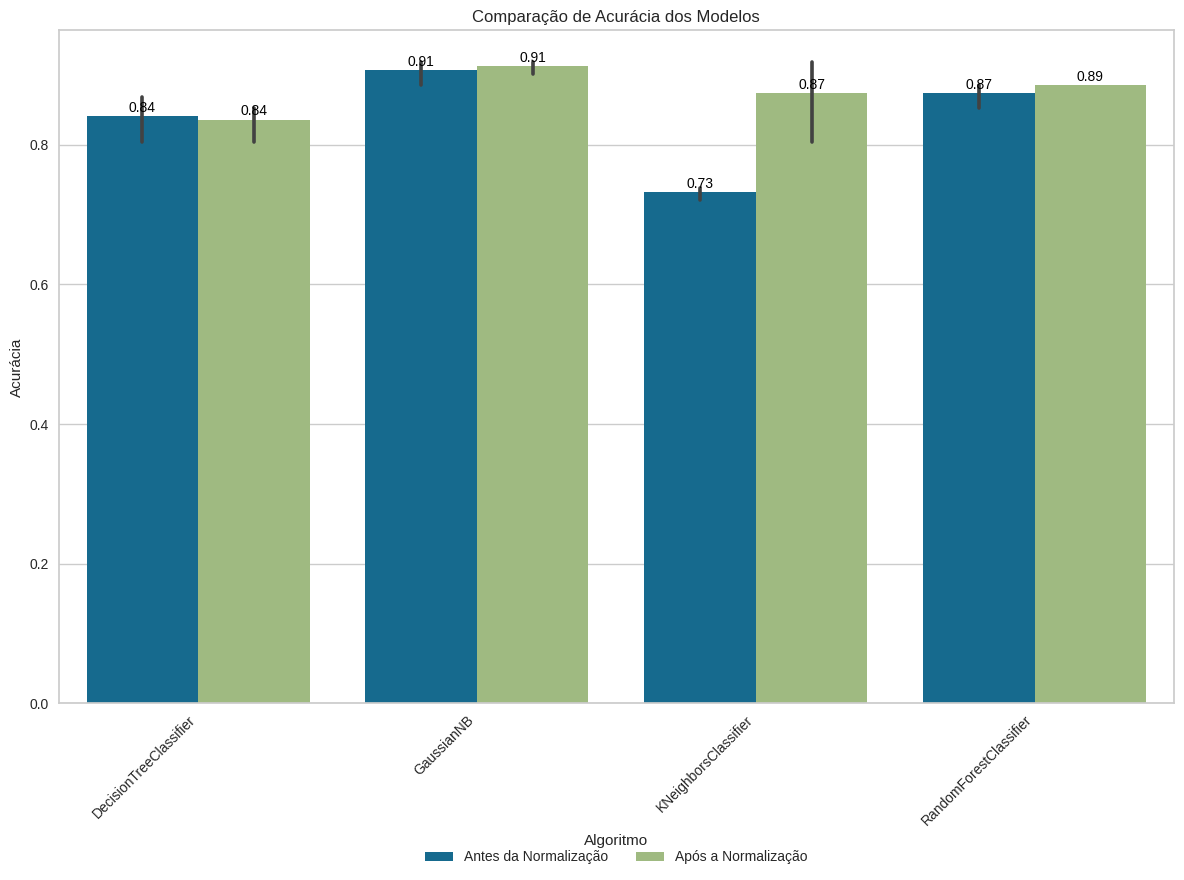

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma nova coluna 'Fase' para indicar antes ou depois da normalização
resultados_finais['Fase'] = resultados_finais['Método'].apply(lambda x: 'Antes da Normalização' if '(base não normalizada)' in x else 'Após a Normalização')

# Reordenar as linhas do DataFrame
resultados_finais = resultados_finais.sort_values(['Fase', 'Método'], ascending=[True, True])

plt.figure(figsize=(12, 9))

# Gráfico de barras usando seaborn, agora agrupando por 'Modelo' e usando 'Fase' como hue
ax = sns.barplot(x='Modelo', y='Acurácia', data=resultados_finais, hue='Fase', dodge=True)

plt.title('Comparação de Acurácia dos Modelos')
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia')
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra, exceto quando o valor for 0.0
for p in ax.patches:
    if p.get_height() > 0:  # Só adiciona a anotação se a altura for maior que 0
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3),
                    textcoords='offset points')

# Mover a legenda para baixo
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(labels))

plt.tight_layout()
plt.show()


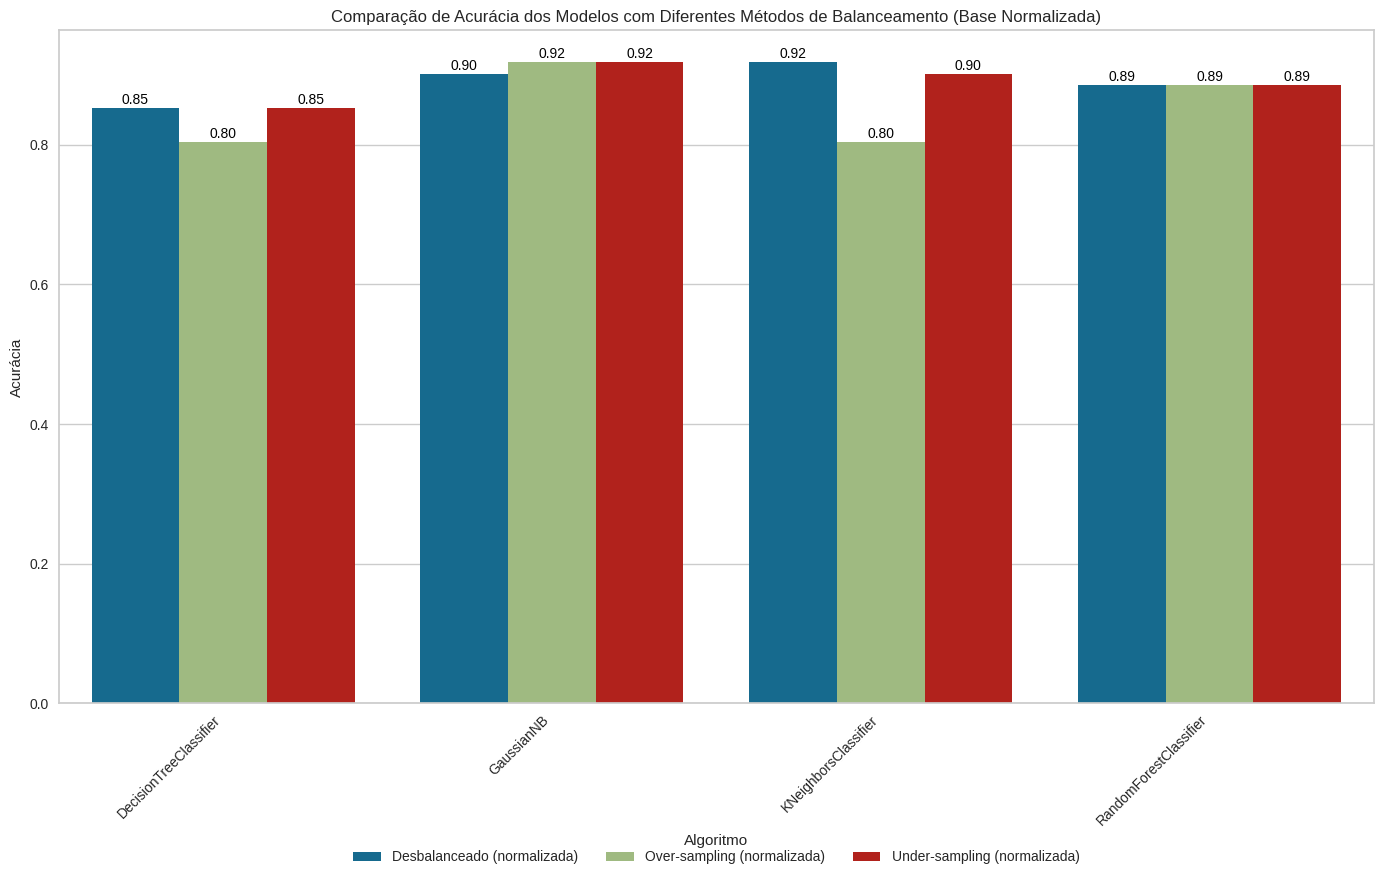

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os resultados apenas para a fase "Após a Normalização"
resultados_normalizados = resultados_finais[resultados_finais['Fase'] == 'Após a Normalização']

# Reordenar as linhas do DataFrame
resultados_normalizados = resultados_normalizados.sort_values(['Método', 'Modelo'], ascending=[True, True])

plt.figure(figsize=(14, 9))

# Gráfico de barras usando seaborn, agrupando por 'Modelo' e usando 'Método' como hue
ax = sns.barplot(x='Modelo', y='Acurácia', data=resultados_normalizados, hue='Método', dodge=True)

plt.title('Comparação de Acurácia dos Modelos com Diferentes Métodos de Balanceamento (Base Normalizada)')
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia')
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra, exceto quando o valor for 0.0
for p in ax.patches:
    if p.get_height() > 0:  # Só adiciona a anotação se a altura for maior que 0
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3),
                    textcoords='offset points')

# Mover a legenda para baixo
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(labels))

plt.tight_layout()
plt.show()


#**Cálculo do Desvio Padrão e Média dos Resultados**

In [203]:
import pandas as pd
import numpy as np

# Supondo que 'resultados_finais' seja o DataFrame com os resultados dos modelos
# (como definido no seu código)

# Agrupa os resultados por modelo e calcula a média e o desvio padrão da acurácia
resultados_agrupados = resultados_finais.groupby('Modelo')['Acurácia'].agg(['mean', 'std'])

# Renomeia as colunas para melhor legibilidade
resultados_agrupados.rename(columns={'mean': 'Média', 'std': 'Desvio Padrão'}, inplace=True)

# Exibe os resultados
print(resultados_agrupados)

                           Média  Desvio Padrão
Modelo                                         
DecisionTreeClassifier  0.838798       0.028236
GaussianNB              0.909836       0.013716
KNeighborsClassifier    0.803279       0.087363
RandomForestClassifier  0.879781       0.013385
